<a href="https://colab.research.google.com/github/Pavel184/Neural_networks/blob/Homework_lesson_5/Homework_lesson_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Homework_lesson_5

In [1]:
from tensorflow.keras.utils import plot_model 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Concatenate, Dense, Dropout #, Activation, MaxPooling2D, Conv2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import math
import plotly.graph_objects as go
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [3]:
np.random.seed(7)

In [4]:
dataframe = pd.read_csv('/content/drive/My Drive/Colab Notebooks/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [5]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [6]:
# Таблица результатов
models_results = {
    'approach': [],
    'units_numb': [],
    'batch_size': [],
    'look_back': [],
    'test_RMSE': [],
    'train_RMSE': []
}

In [7]:
# Базовая модель
batch_size = 1
units_numb = 4
look_back = 3

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

model = Sequential()
model.add(LSTM(units_numb, batch_input_shape=(batch_size, look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

hh = model.fit(trainX, trainY, epochs=100, batch_size=batch_size, verbose=0, validation_data=(testX, testY), shuffle=False)

trainPredict = model.predict(trainX, batch_size=batch_size)
testPredict = model.predict(testX, batch_size=batch_size)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

models_results['approach'].append('Baseline LSTM')
models_results['units_numb'].append(units_numb)
models_results['batch_size'].append(batch_size)
models_results['look_back'].append(look_back)
models_results['test_RMSE'].append(testScore)
models_results['train_RMSE'].append(trainScore)

fig = go.Figure()
fig.add_trace(go.Scattergl(y=hh.history['loss'],
                    name='Train'))
fig.add_trace(go.Scattergl(y=hh.history['val_loss'],
                    name='Test'))
fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')
fig.show()

Train Score: 24.35 RMSE
Test Score: 66.27 RMSE


In [8]:
# Базовая модель + доп. слой
batch_size = 1
units_numb = 4
look_back = 3

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

model = Sequential()
model.add(LSTM(units_numb, batch_input_shape=(batch_size, look_back, 1),  return_sequences=True))
model.add(LSTM(units_numb, batch_input_shape=(batch_size, look_back, 1),  return_sequences=True))
model.add(LSTM(units_numb, batch_input_shape=(batch_size, look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

hh = model.fit(trainX, trainY, epochs=180, batch_size=batch_size, verbose=0, validation_data=(testX, testY), shuffle=False)

trainPredict = model.predict(trainX, batch_size=batch_size)
testPredict = model.predict(testX, batch_size=batch_size)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

models_results['approach'].append('Baseline LSTM + more layers')
models_results['units_numb'].append(units_numb)
models_results['batch_size'].append(batch_size)
models_results['look_back'].append(look_back)
models_results['test_RMSE'].append(testScore)
models_results['train_RMSE'].append(trainScore)

fig = go.Figure()
fig.add_trace(go.Scattergl(y=hh.history['loss'],
                    name='Train'))
fig.add_trace(go.Scattergl(y=hh.history['val_loss'],
                    name='Test'))
fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')
fig.show()

Train Score: 22.83 RMSE
Test Score: 63.17 RMSE


In [9]:
# Базовая модель + больше нейронов
batch_size = 1
units_numb = 12
look_back = 3

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

model = Sequential()
model.add(LSTM(units_numb, batch_input_shape=(batch_size, look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

hh = model.fit(trainX, trainY, epochs=100, batch_size=batch_size, verbose=0, validation_data=(testX, testY), shuffle=False)

trainPredict = model.predict(trainX, batch_size=batch_size)
testPredict = model.predict(testX, batch_size=batch_size)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

models_results['approach'].append('Baseline LSTM + more neurons')
models_results['units_numb'].append(units_numb)
models_results['batch_size'].append(batch_size)
models_results['look_back'].append(look_back)
models_results['test_RMSE'].append(testScore)
models_results['train_RMSE'].append(trainScore)

fig = go.Figure()
fig.add_trace(go.Scattergl(y=hh.history['loss'],
                    name='Train'))
fig.add_trace(go.Scattergl(y=hh.history['val_loss'],
                    name='Test'))
fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')
fig.show()

Train Score: 22.39 RMSE
Test Score: 50.74 RMSE


In [10]:
# Базовая модель с меньшим look_back
batch_size = 1
units_numb = 4
look_back = 1

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

model = Sequential()
model.add(LSTM(units_numb, batch_input_shape=(batch_size, look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

hh = model.fit(trainX, trainY, epochs=100, batch_size=batch_size, verbose=0, validation_data=(testX, testY), shuffle=False)

trainPredict = model.predict(trainX, batch_size=batch_size)
testPredict = model.predict(testX, batch_size=batch_size)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

models_results['approach'].append('Baseline LSTM + low look_back')
models_results['units_numb'].append(units_numb)
models_results['batch_size'].append(batch_size)
models_results['look_back'].append(look_back)
models_results['test_RMSE'].append(testScore)
models_results['train_RMSE'].append(trainScore)

fig = go.Figure()
fig.add_trace(go.Scattergl(y=hh.history['loss'],
                    name='Train'))
fig.add_trace(go.Scattergl(y=hh.history['val_loss'],
                    name='Test'))
fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')
fig.show()

Train Score: 23.46 RMSE
Test Score: 49.28 RMSE


In [11]:
# Базовая модель с большим batch_size
batch_size = 2
units_numb = 4
look_back = 3

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

model = Sequential()
model.add(LSTM(units_numb, batch_input_shape=(batch_size, look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

hh = model.fit(trainX, trainY, epochs=100, batch_size=batch_size, verbose=0, validation_data=(testX, testY), shuffle=False)

trainPredict = model.predict(trainX, batch_size=batch_size)
testPredict = model.predict(testX, batch_size=batch_size)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

models_results['approach'].append('Baseline LSTM + bigger batch_size')
models_results['units_numb'].append(units_numb)
models_results['batch_size'].append(batch_size)
models_results['look_back'].append(look_back)
models_results['test_RMSE'].append(testScore)
models_results['train_RMSE'].append(trainScore)

fig = go.Figure()
fig.add_trace(go.Scattergl(y=hh.history['loss'],
                    name='Train'))
fig.add_trace(go.Scattergl(y=hh.history['val_loss'],
                    name='Test'))
fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')
fig.show()

Train Score: 30.75 RMSE
Test Score: 65.34 RMSE


In [12]:
# Базовая модель + меньше нейронов
batch_size = 1
units_numb = 2
look_back = 3

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

model = Sequential()
model.add(LSTM(units_numb, batch_input_shape=(batch_size, look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

hh = model.fit(trainX, trainY, epochs=100, batch_size=batch_size, verbose=0, validation_data=(testX, testY), shuffle=False)

trainPredict = model.predict(trainX, batch_size=batch_size)
testPredict = model.predict(testX, batch_size=batch_size)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

models_results['approach'].append('Baseline LSTM + less neurons')
models_results['units_numb'].append(units_numb)
models_results['batch_size'].append(batch_size)
models_results['look_back'].append(look_back)
models_results['test_RMSE'].append(testScore)
models_results['train_RMSE'].append(trainScore)

fig = go.Figure()
fig.add_trace(go.Scattergl(y=hh.history['loss'],
                    name='Train'))
fig.add_trace(go.Scattergl(y=hh.history['val_loss'],
                    name='Test'))
fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')
fig.show()

Train Score: 28.97 RMSE
Test Score: 63.65 RMSE


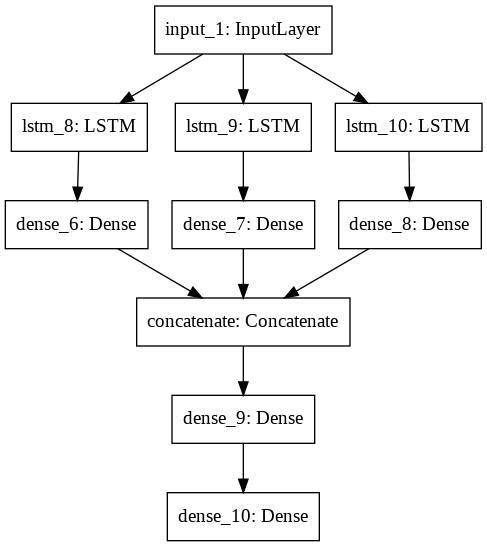

In [13]:
# Модель с параллельными нитями
batch_size = 1
look_back = 3

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

first_input = Input(batch_input_shape=(batch_size, look_back, 1))
x11= LSTM(4)(first_input)
first_dense = Dense(5)(x11)

x22= LSTM(16)(first_input)
second_dense = Dense(10)(x22)

x33= LSTM(32)(first_input)
third_dense = Dense(20)(x33)

merge_one = Concatenate(   )([first_dense, second_dense, third_dense])

last_dense = Dense(10)(merge_one)
output = Dense(1)(last_dense)

model = Model(inputs=first_input, outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

plot_model(model,'model_stek.png')

In [14]:
hh = model.fit(trainX, trainY, epochs=100, batch_size=batch_size, verbose=0, validation_data=(testX, testY), shuffle=False)

trainPredict = model.predict(trainX, batch_size=batch_size)
testPredict = model.predict(testX, batch_size=batch_size)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

models_results['approach'].append('parallel lines LSTM')
models_results['units_numb'].append(units_numb)
models_results['batch_size'].append(batch_size)
models_results['look_back'].append(look_back)
models_results['test_RMSE'].append(testScore)
models_results['train_RMSE'].append(trainScore)

fig = go.Figure()
fig.add_trace(go.Scattergl(y=hh.history['loss'],
                    name='Train'))
fig.add_trace(go.Scattergl(y=hh.history['val_loss'],
                    name='Test'))
fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')
fig.show()

Train Score: 26.59 RMSE
Test Score: 82.28 RMSE


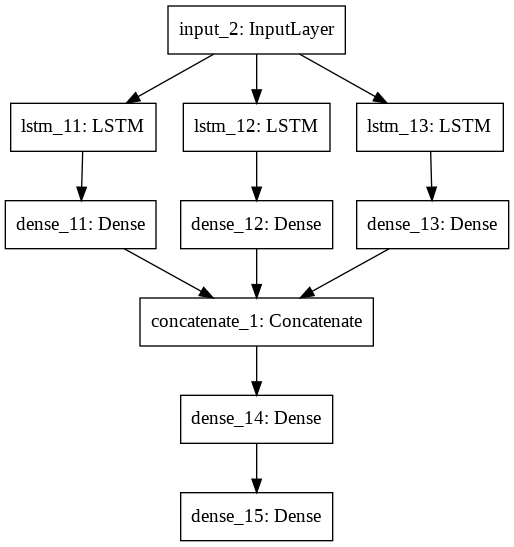

In [15]:
# Модель с параллельными нитями, меньшее количество эпох
batch_size = 1
look_back = 3

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

first_input = Input(batch_input_shape=(batch_size, look_back, 1))
x11= LSTM(4)(first_input)
first_dense = Dense(5)(x11)

x22= LSTM(16)(first_input)
second_dense = Dense(10)(x22)

x33= LSTM(32)(first_input)
third_dense = Dense(20)(x33)

merge_one = Concatenate(   )([first_dense, second_dense, third_dense])

last_dense = Dense(10)(merge_one)
output = Dense(1)(last_dense)

model = Model(inputs=first_input, outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

plot_model(model,'model_stek.png')

In [16]:
hh = model.fit(trainX, trainY, epochs=23, batch_size=batch_size, verbose=0, validation_data=(testX, testY), shuffle=False)

trainPredict = model.predict(trainX, batch_size=batch_size)
testPredict = model.predict(testX, batch_size=batch_size)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

models_results['approach'].append('parallel lines LSTM less epochs')
models_results['units_numb'].append(units_numb)
models_results['batch_size'].append(batch_size)
models_results['look_back'].append(look_back)
models_results['test_RMSE'].append(testScore)
models_results['train_RMSE'].append(trainScore)

fig = go.Figure()
fig.add_trace(go.Scattergl(y=hh.history['loss'],
                    name='Train'))
fig.add_trace(go.Scattergl(y=hh.history['val_loss'],
                    name='Test'))
fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')
fig.show()

Train Score: 43.75 RMSE
Test Score: 49.79 RMSE


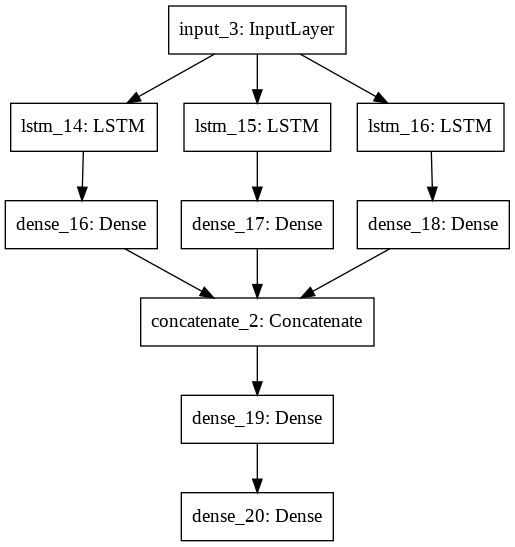

In [17]:
# Модель с параллельными нитями, меньшее количество эпох, больше нейронов, batch_size = 4
batch_size = 4
look_back = 3

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

first_input = Input(batch_input_shape=(batch_size, look_back, 1))
x11= LSTM(16)(first_input)
first_dense = Dense(5)(x11)

x22= LSTM(32)(first_input)
second_dense = Dense(10)(x22)

x33= LSTM(64)(first_input)
third_dense = Dense(20)(x33)

merge_one = Concatenate(   )([first_dense, second_dense, third_dense])

last_dense = Dense(10)(merge_one)
output = Dense(1)(last_dense)

model = Model(inputs=first_input, outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

plot_model(model,'model_stek.png')

In [18]:
hh = model.fit(trainX, trainY, epochs=43, batch_size=batch_size, verbose=0, validation_data=(testX, testY), shuffle=False)

trainPredict = model.predict(trainX, batch_size=batch_size)
testPredict = model.predict(testX, batch_size=batch_size)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

models_results['approach'].append('parallel lines LSTM more neurons')
models_results['units_numb'].append(units_numb)
models_results['batch_size'].append(batch_size)
models_results['look_back'].append(look_back)
models_results['test_RMSE'].append(testScore)
models_results['train_RMSE'].append(trainScore)

fig = go.Figure()
fig.add_trace(go.Scattergl(y=hh.history['loss'],
                    name='Train'))
fig.add_trace(go.Scattergl(y=hh.history['val_loss'],
                    name='Test'))
fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')
fig.show()

Train Score: 25.56 RMSE
Test Score: 42.10 RMSE


In [19]:
df_1 = pd.DataFrame(data=models_results).sort_values('test_RMSE', ascending=True)
df_1.head(10)

,approach,units_numb,batch_size,look_back,test_RMSE,train_RMSE
8,parallel lines LSTM more neurons,2,4,3,42.104837,25.557102
3,Baseline LSTM + low look_back,4,1,1,49.275629,23.464942
7,parallel lines LSTM less epochs,2,1,3,49.785670,43.748946
2,Baseline LSTM + more neurons,12,1,3,50.744893,22.386748
1,Baseline LSTM + more layers,4,1,3,63.171562,22.833295
5,Baseline LSTM + less neurons,2,1,3,63.648803,28.972913
4,Baseline LSTM + bigger batch_size,4,2,3,65.341301,30.745727
0,Baseline LSTM,4,1,3,66.274807,24.352911
6,parallel lines LSTM,2,1,3,82.280033,26.590139


In [20]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [21]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

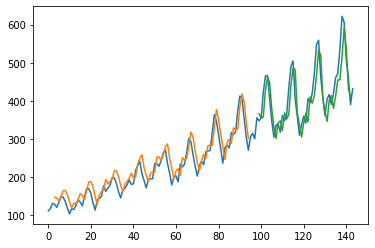

In [22]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Вывод: В целом к улучшению качества модели привело увеличение ширины модели(количество нейронов и параллельных нитей), т.к. увеличевается количество признаков. Так же в данной задаче уменьшение "глубины зпоминания" привело к улучшению метрики.